# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict Sales of a particular brick and mortar retail store. The data that we have ranges from 2000 to 2015.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read the data from the '.csv' file as a monthly Time Series.

In [2]:
df = pd.read_csv('Sales.csv')
df.head()

,RetailSales
0,2585
1,3368
2,3210
3,3111
4,3756


## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [3]:
date = pd.date_range(start='1/1/2000', end='8/1/2015', freq='M')
date

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,RetailSales,Time_Stamp
0,2585,2000-01-31
1,3368,2000-02-29
2,3210,2000-03-31
3,3111,2000-04-30
4,3756,2000-05-31


In [5]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,RetailSales
Time_Stamp,
2000-01-31,2585
2000-02-29,3368
2000-03-31,3210
2000-04-30,3111
2000-05-31,3756


## Plot the Time Series to understand the behaviour of the data.

In [6]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

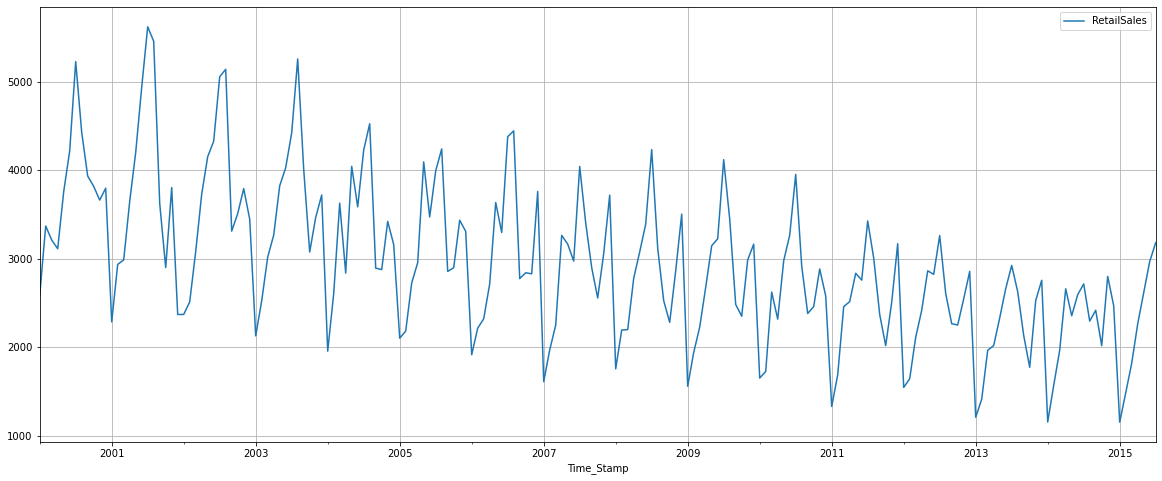

In [7]:
df.plot()
plt.grid();

We can see that there is a slight downward trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [8]:
df.describe()

,RetailSales
count,187.000000
mean,2962.304813
std,878.968431
min,1153.000000
25%,2361.500000
50%,2876.000000
75%,3467.500000
max,5618.000000


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Plot a boxplot to understand the spread of accidents across different years and within different months across years.

### Yearly Boxplot

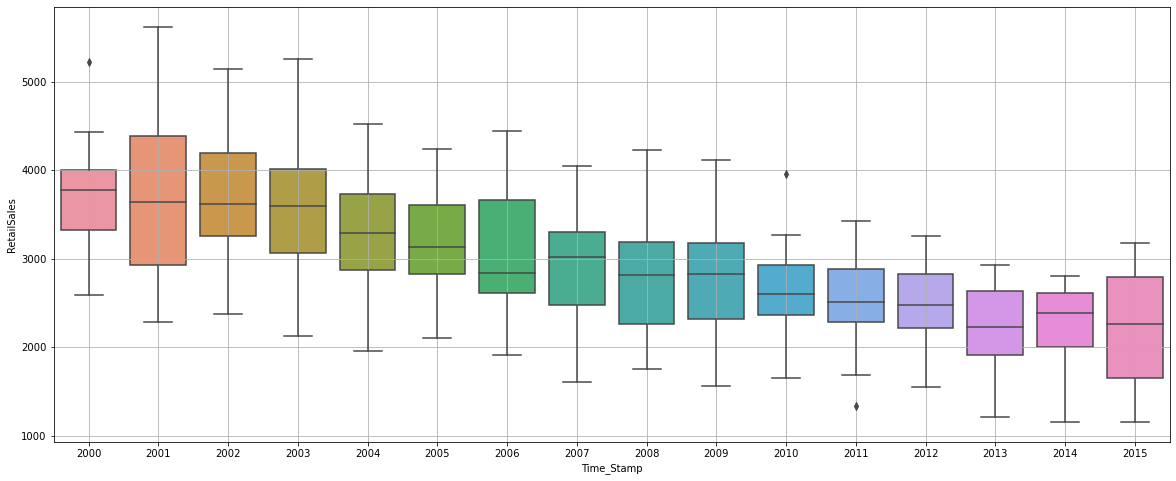

In [9]:
sns.boxplot(x = df.index.year,y = df['RetailSales'])
plt.grid();

The yearly boxplots also shows that the Sales have decreased towards the last few years.

### Monthly Plot

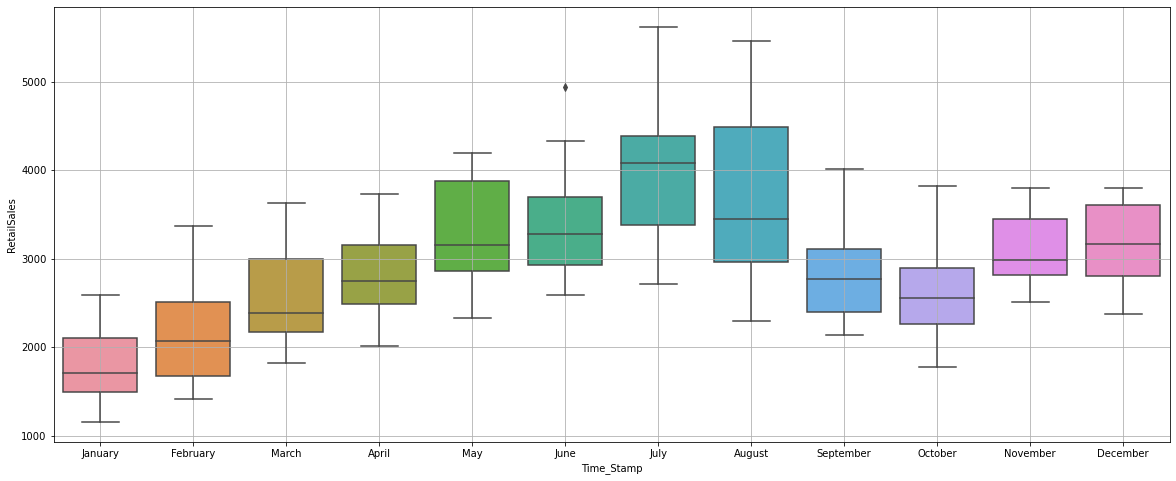

In [10]:
sns.boxplot(x = df.index.month_name(),y = df['RetailSales'])
plt.grid();

There is a clear distinction of 'RetailSales' within different months spread across various years. The highest such numbers are being recorded in the month of July-August across various years.

## Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

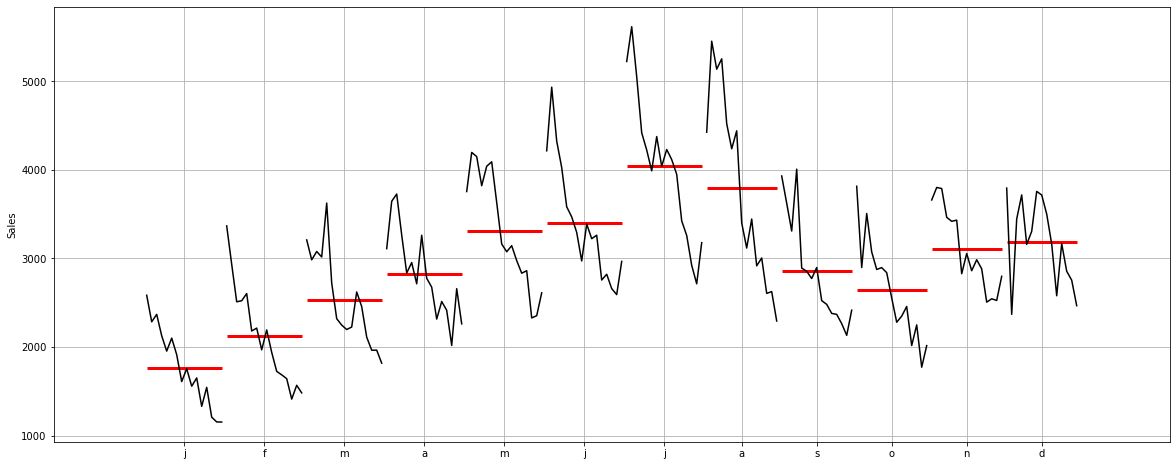

In [11]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['RetailSales'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('RetailSales' in this case) across various months. The red line is the median value.

## Plot a graph of monthly RetailSales across years.

In [12]:
monthly_sales_across_years = pd.pivot_table(df, values = 'RetailSales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
2000,2585.0,3368.0,3210.0,3111.0,3756.0,4216.0,5225.0,4426.0,3932.0,3816.0,3661.0,3795.0
2001,2285.0,2934.0,2985.0,3646.0,4198.0,4935.0,5618.0,5454.0,3624.0,2898.0,3802.0,2369.0
2002,2369.0,2511.0,3079.0,3728.0,4151.0,4326.0,5054.0,5138.0,3310.0,3508.0,3790.0,3446.0
2003,2127.0,2523.0,3017.0,3265.0,3822.0,4027.0,4420.0,5255.0,4009.0,3074.0,3465.0,3718.0
2004,1954.0,2604.0,3626.0,2836.0,4042.0,3584.0,4225.0,4523.0,2892.0,2876.0,3420.0,3159.0
2005,2101.0,2181.0,2724.0,2954.0,4092.0,3470.0,3990.0,4239.0,2855.0,2897.0,3433.0,3307.0
2006,1914.0,2214.0,2320.0,2714.0,3633.0,3295.0,4377.0,4442.0,2774.0,2840.0,2828.0,3758.0
2007,1610.0,1968.0,2248.0,3262.0,3164.0,2972.0,4041.0,3402.0,2898.0,2555.0,3056.0,3717.0
2008,1755.0,2193.0,2198.0,2777.0,3076.0,3389.0,4231.0,3118.0,2524.0,2280.0,2862.0,3502.0


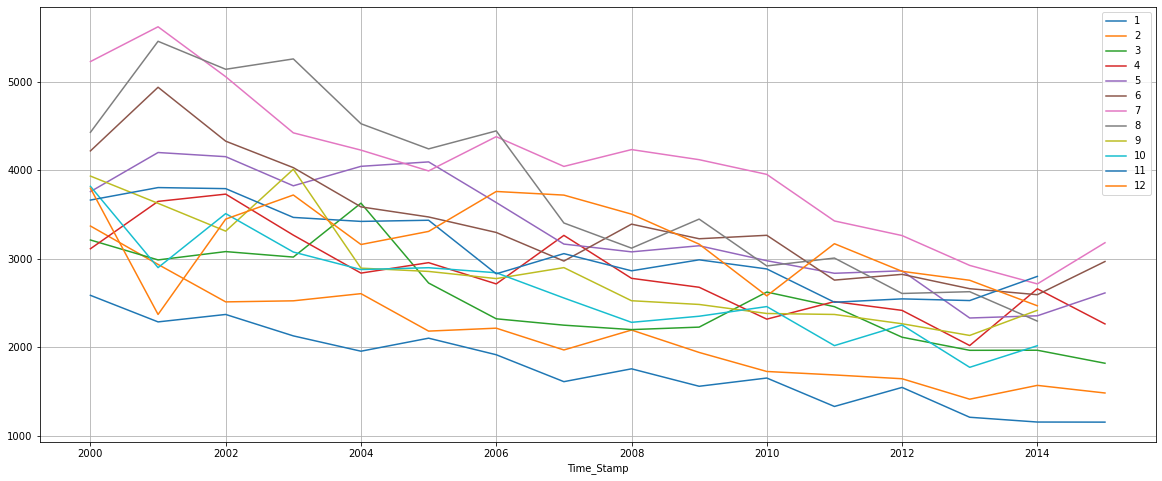

In [13]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

## Plot the Empirical Cumulative Distribution.

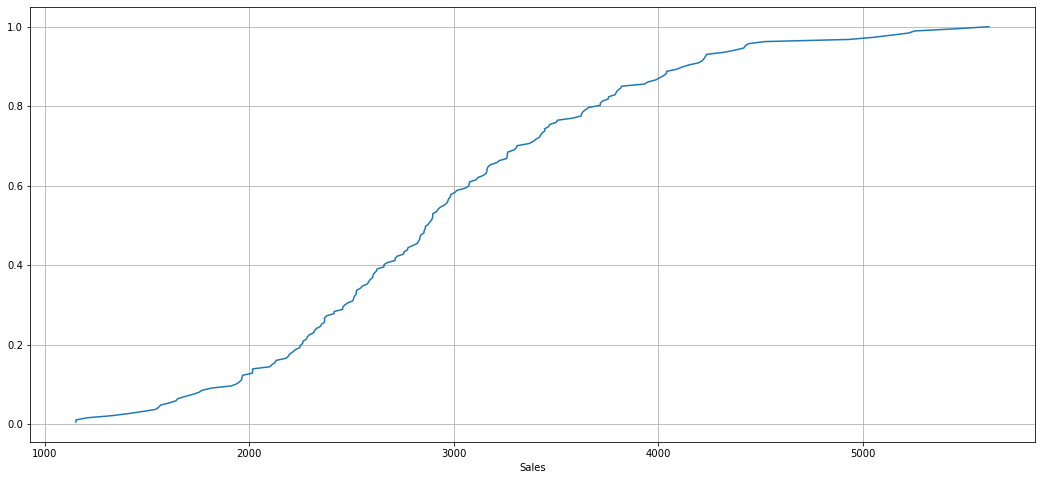

In [14]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['RetailSales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.

## Plot the average RetailSales per month and the month on month percentage change of RetailSales.

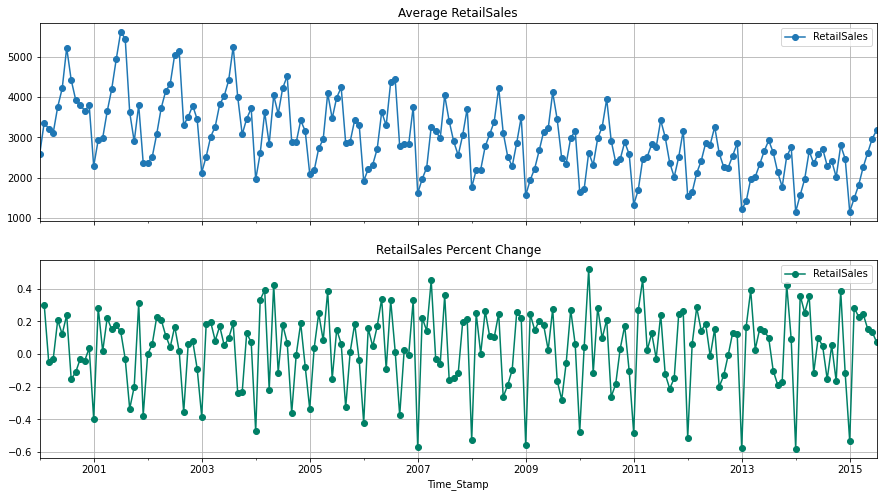

In [15]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["RetailSales"].mean()
pct_change = df.groupby(df.index)["RetailSales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

The above two graphs tells us the Average 'RetailSales' and the Percentage change of 'RetailSales' with respect to the time.

## Decompose the Time Series and plot the different components.

In [16]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

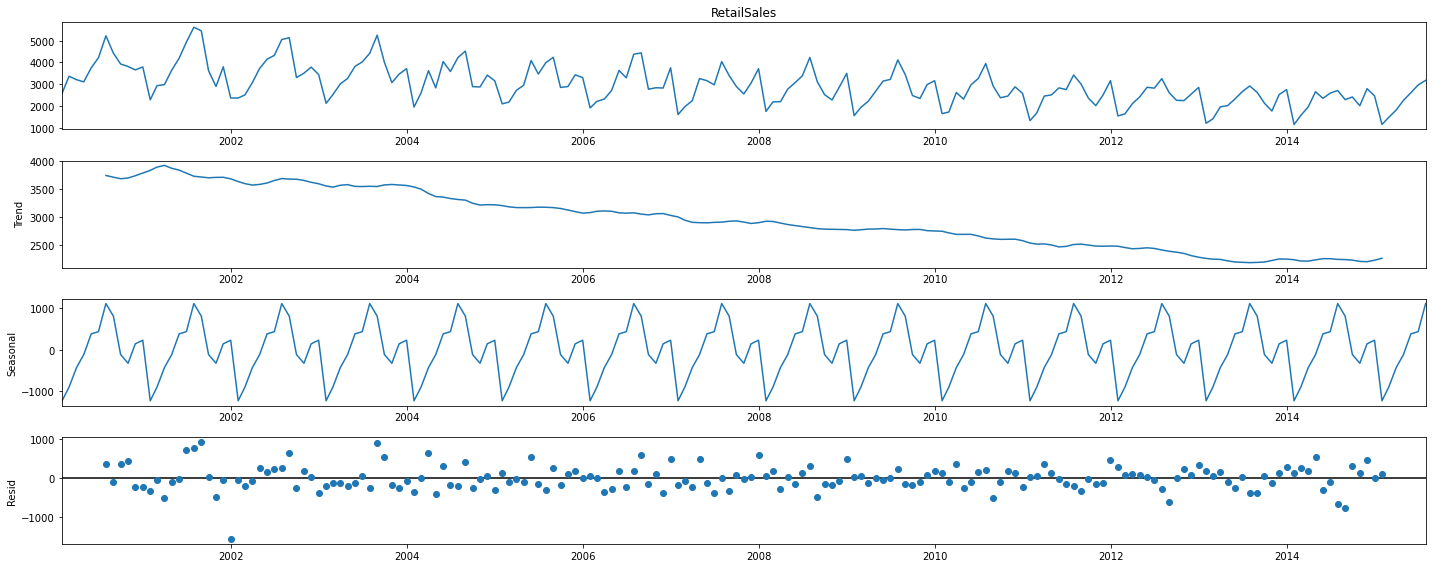

In [17]:
decomposition = seasonal_decompose(df['RetailSales'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [18]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31   -1230.608333
2000-02-29    -900.364286
2000-03-31    -429.435714
2000-04-30    -116.923810
2000-05-31     383.713095
2000-06-30     435.802381
2000-07-31    1113.975000
2000-08-31     811.258333
2000-09-30    -115.036111
2000-10-31    -325.811111
2000-11-30     143.525000
2000-12-31     229.905556
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31           NaN
2000-02-29           NaN
2000-03-31           NaN
2000-04-30           NaN
2000-05-31           NaN
2000-06-30           NaN
2000-07-31    365.108333
2000-08-31   -100.591667
2000-09-30    359.161111
2000-10-31    441.0194

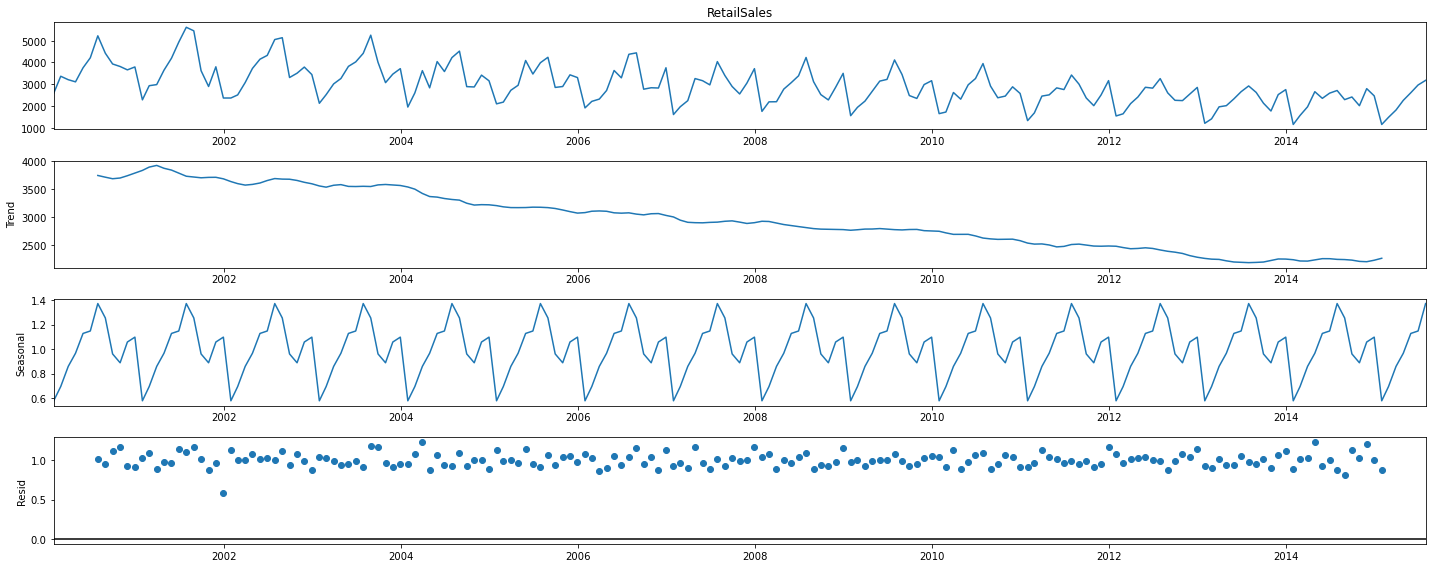

In [19]:
decomposition = seasonal_decompose(df['RetailSales'],model='multiplicative')
decomposition.plot();

For the multiplicative series, we see that a lot of residuals are located around 1.

In [20]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2000-01-31            NaN
2000-02-29            NaN
2000-03-31            NaN
2000-04-30            NaN
2000-05-31            NaN
2000-06-30            NaN
2000-07-31    3745.916667
2000-08-31    3715.333333
2000-09-30    3687.875000
2000-10-31    3700.791667
2000-11-30    3741.500000
2000-12-31    3789.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2000-01-31    0.577667
2000-02-29    0.693995
2000-03-31    0.858591
2000-04-30    0.965907
2000-05-31    1.127574
2000-06-30    1.147570
2000-07-31    1.371537
2000-08-31    1.254060
2000-09-30    0.960255
2000-10-31    0.887973
2000-11-30    1.057467
2000-12-31    1.097405
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
2000-06-30         NaN
2000-07-31    1.017000
2000-08-31    0.949938
2000-09-30    1.110327
2000-10-31    1.161218
2000-11-30    0.925310
2000-12-31    0.912473
Name: r

## Check for stationarity of the whole Time Series data.

In [21]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

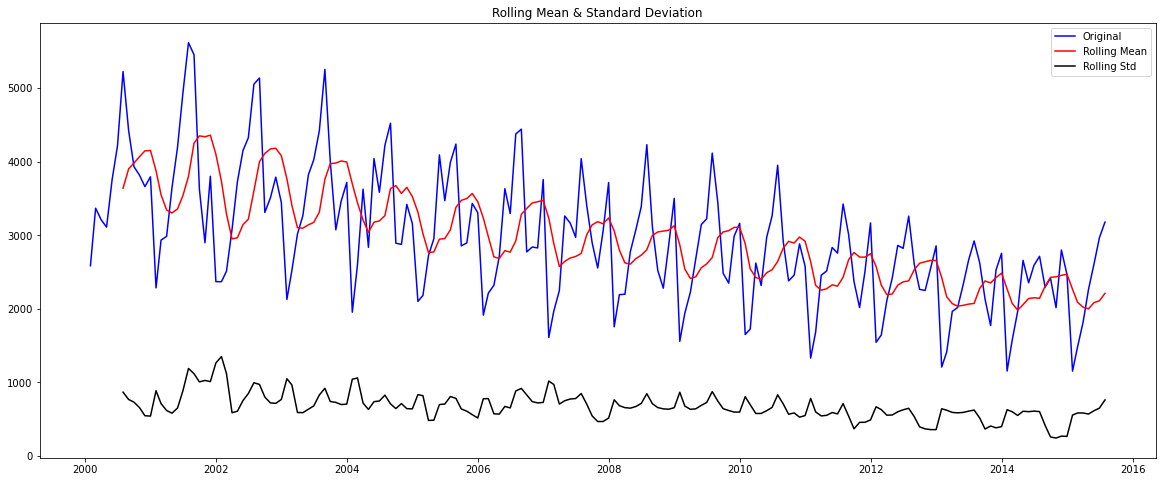

Results of Dickey-Fuller Test:
Test Statistic                  -0.907380
p-value                          0.785532
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [22]:
test_stationarity(df['RetailSales'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

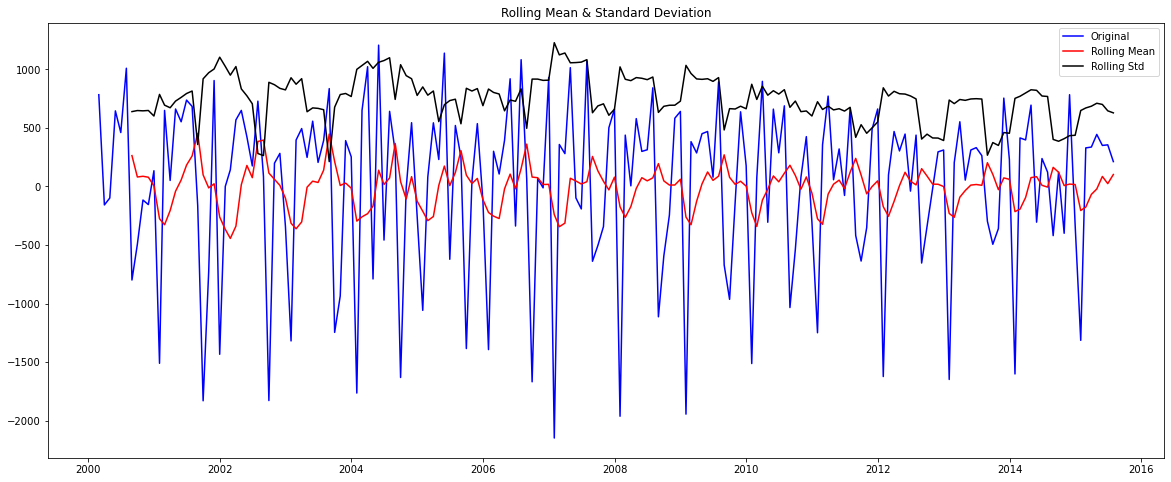

Results of Dickey-Fuller Test:
Test Statistic                 -23.500036
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [23]:
test_stationarity(df['RetailSales'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

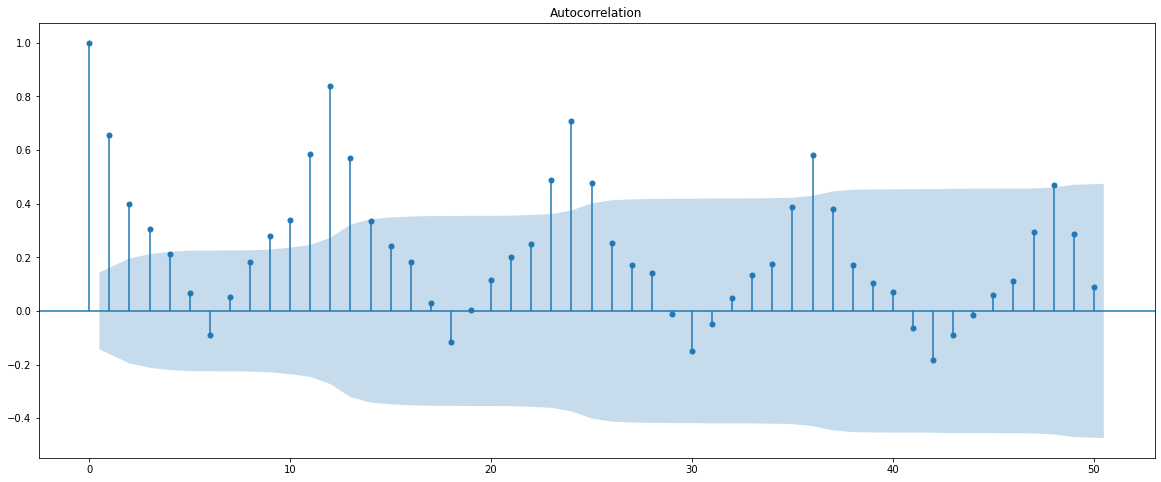

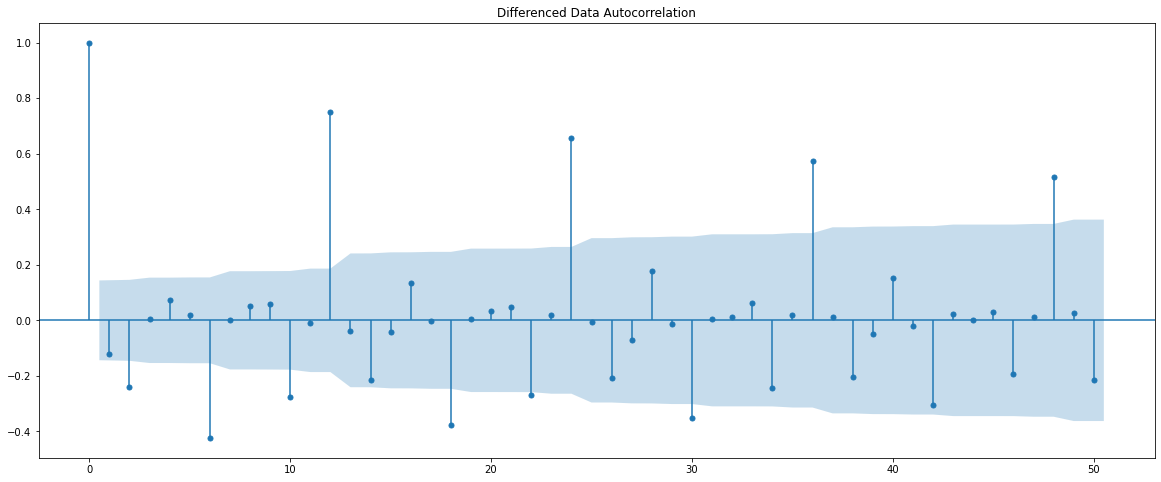

In [25]:
plot_acf(df['RetailSales'],lags=50)
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

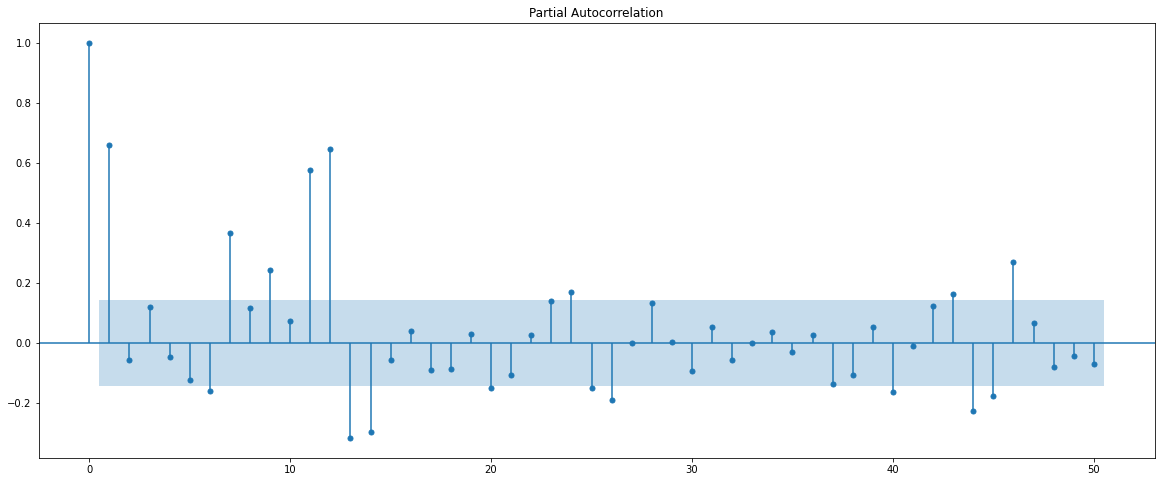

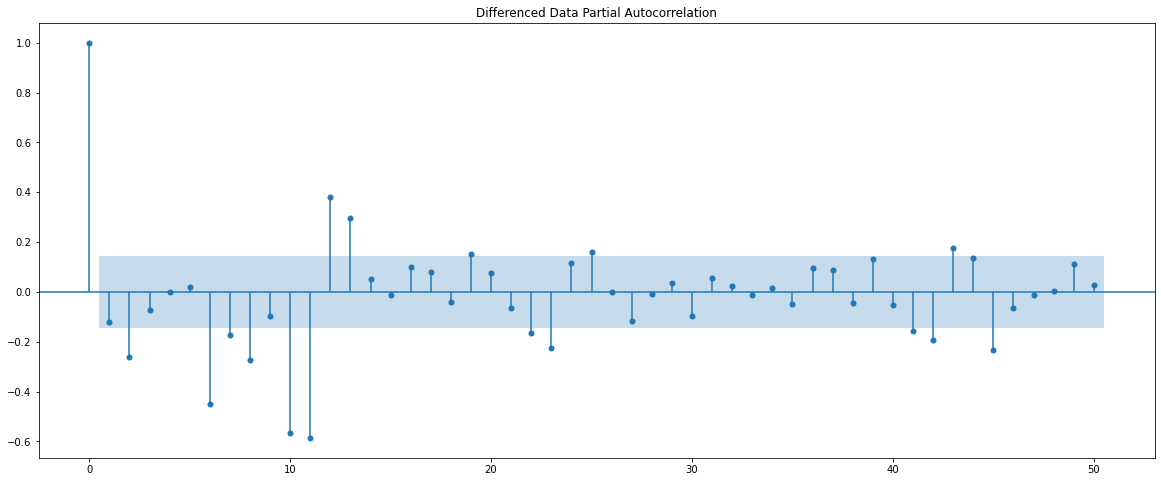

In [26]:
plot_pacf(df['RetailSales'],lags=50)
plot_pacf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2010. Test Data is from the beginning of 2011 to the last time stamp provided.

In [27]:
train=df[df.index.year < 2011]
test=df[df.index.year >= 2011]

In [28]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [29]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,RetailSales
Time_Stamp,
2000-01-31,2585
2000-02-29,3368
2000-03-31,3210
2000-04-30,3111
2000-05-31,3756


Last few rows of Training Data


,RetailSales
Time_Stamp,
2010-08-31,2917
2010-09-30,2380
2010-10-31,2458
2010-11-30,2883
2010-12-31,2579


First few rows of Test Data


,RetailSales
Time_Stamp,
2011-01-31,1330
2011-02-28,1686
2011-03-31,2457
2011-04-30,2514
2011-05-31,2834


Last few rows of Test Data


,RetailSales
Time_Stamp,
2015-03-31,1818
2015-04-30,2262
2015-05-31,2612
2015-06-30,2967
2015-07-31,3179


In [30]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Check for stationarity of the Training Data Time Series.

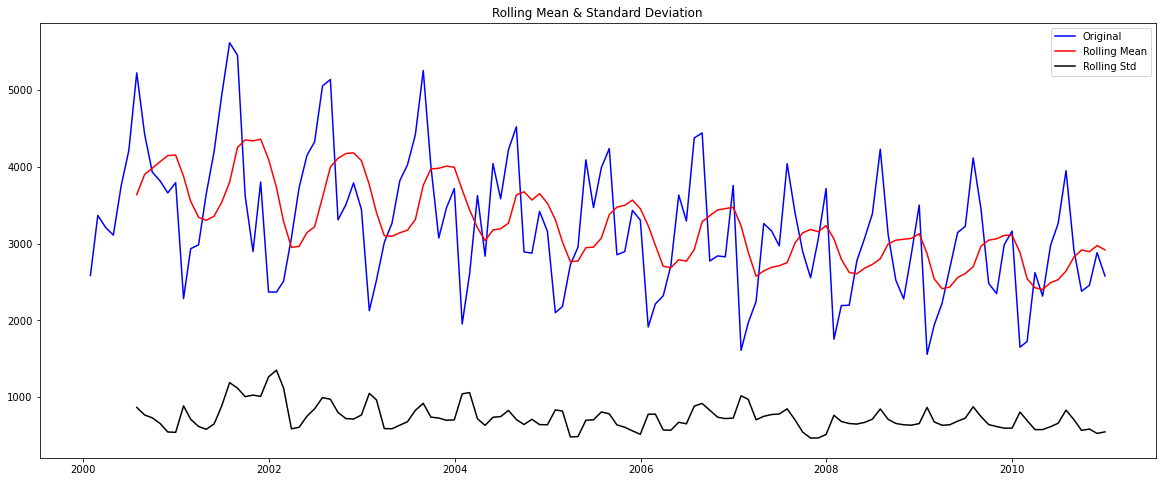

Results of Dickey-Fuller Test:
Test Statistic                  -0.380788
p-value                          0.913257
#Lags Used                      11.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [31]:
test_stationarity(train['RetailSales'])

We see that the series is not stationary at $\alpha$ = 0.05.

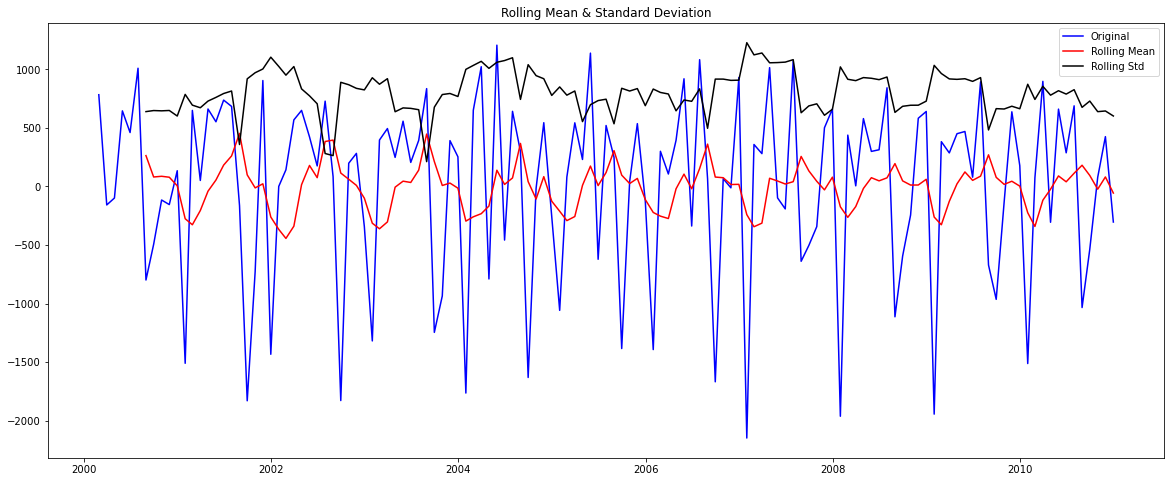

Results of Dickey-Fuller Test:
Test Statistic                 -18.948648
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    120.000000
Critical Value (1%)             -3.486056
Critical Value (5%)             -2.885943
Critical Value (10%)            -2.579785
dtype: float64 



In [32]:
test_stationarity(train['RetailSales'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2000-01-31 to 2010-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   RetailSales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [34]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [35]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [36]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['RetailSales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2118.915581713951


C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 1) - AIC:2116.8425606047226
ARIMA(0, 1, 2) - AIC:2088.832415160077
ARIMA(1, 1, 0) - AIC:2118.646076077099


C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

ARIMA(1, 1, 1) - AIC:2089.6094605380476
ARIMA(1, 1, 2) - AIC:2088.628673648079
ARIMA(2, 1, 0) - AIC:2113.4559523206967
ARIMA(2, 1, 1) - AIC:2088.551356720664


C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

ARIMA(2, 1, 2) - AIC:2088.76116219243


In [37]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
7,"(2, 1, 1)",2088.551357
5,"(1, 1, 2)",2088.628674
8,"(2, 1, 2)",2088.761162
2,"(0, 1, 2)",2088.832415
4,"(1, 1, 1)",2089.609461
6,"(2, 1, 0)",2113.455952
1,"(0, 1, 1)",2116.842561
3,"(1, 1, 0)",2118.646076
0,"(0, 1, 0)",2118.915582


In [38]:
auto_ARIMA = ARIMA(train['RetailSales'], order=(2,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

                             ARIMA Model Results                              
Dep. Variable:          D.RetailSales   No. Observations:                  131
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1039.276
Method:                       css-mle   S.D. of innovations            664.314
Date:                Sun, 05 Sep 2021   AIC                           2088.551
Time:                        16:59:41   BIC                           2102.927
Sample:                    02-29-2000   HQIC                          2094.393
                         - 12-31-2010                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -9.1739      2.615     -3.508      0.000     -14.299      -4.048
ar.L1.D.RetailSales     0.5782      0.087      6.650      0.000       0.408       0.749
ar.L2.D.RetailSa

## Predict on the Test Set using this model and evaluate the model.

In [39]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [40]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

564.1019585728842


In [41]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE
"ARIMA(2,1,1)",564.101959


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

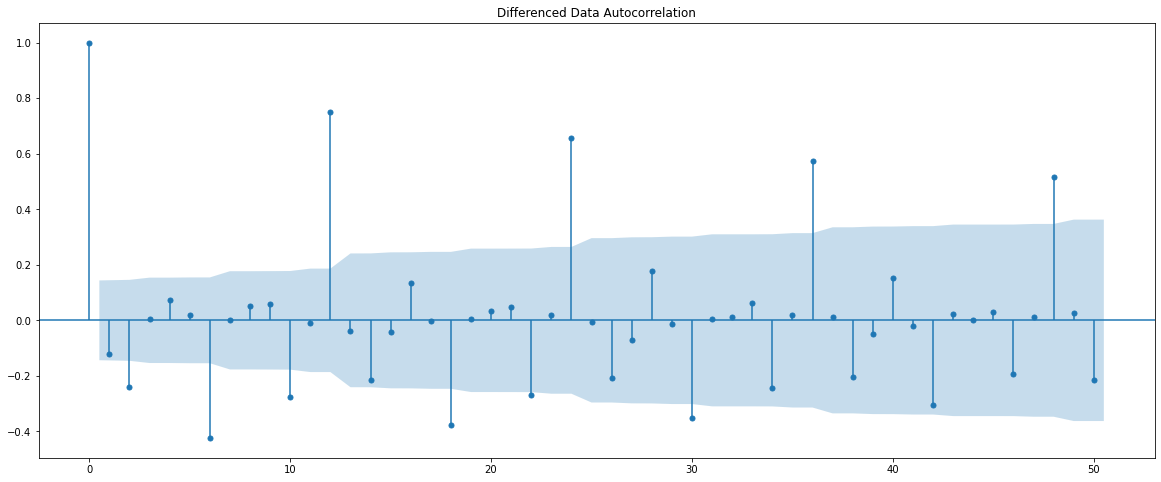

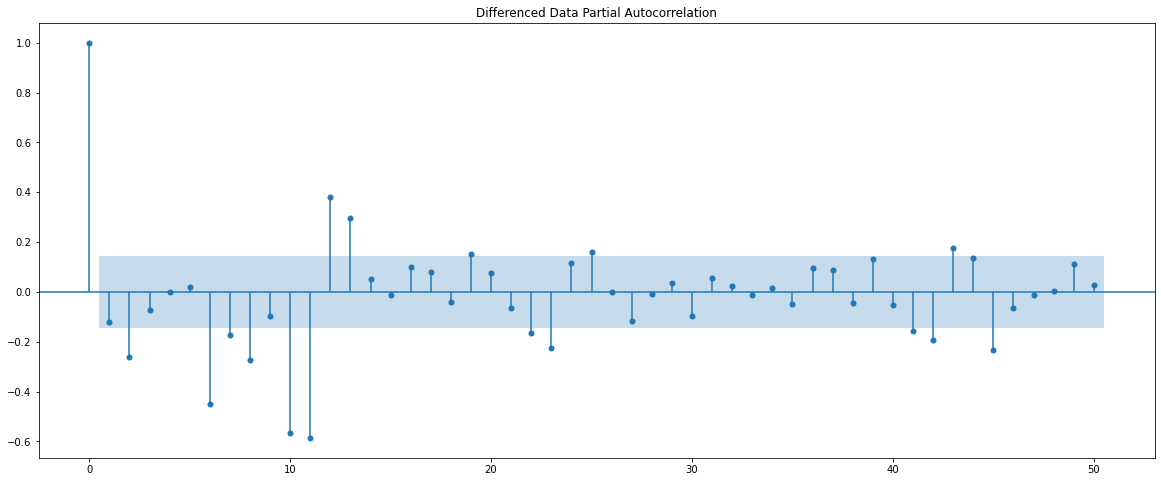

In [42]:
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [43]:
manual_ARIMA = ARIMA(train['RetailSales'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.RetailSales   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1057.458
Method:                           css   S.D. of innovations            775.306
Date:                Sun, 05 Sep 2021   AIC                           2118.916
Time:                        16:59:44   BIC                           2124.666
Sample:                    02-29-2000   HQIC                          2121.252
                         - 12-31-2010                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0458     67.739     -0.001      0.999    -132.811     132.720


C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


We get a comparatively simpler model by looking at the ACF and the PACF plots.

###### Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.

## Predict on the Test Set using this model and evaluate the model.

In [44]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [45]:
rmse = mean_squared_error(test['RetailSales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

611.2873440695147


In [46]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",564.101959
"ARIMA(0,1,0)",611.287344


We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

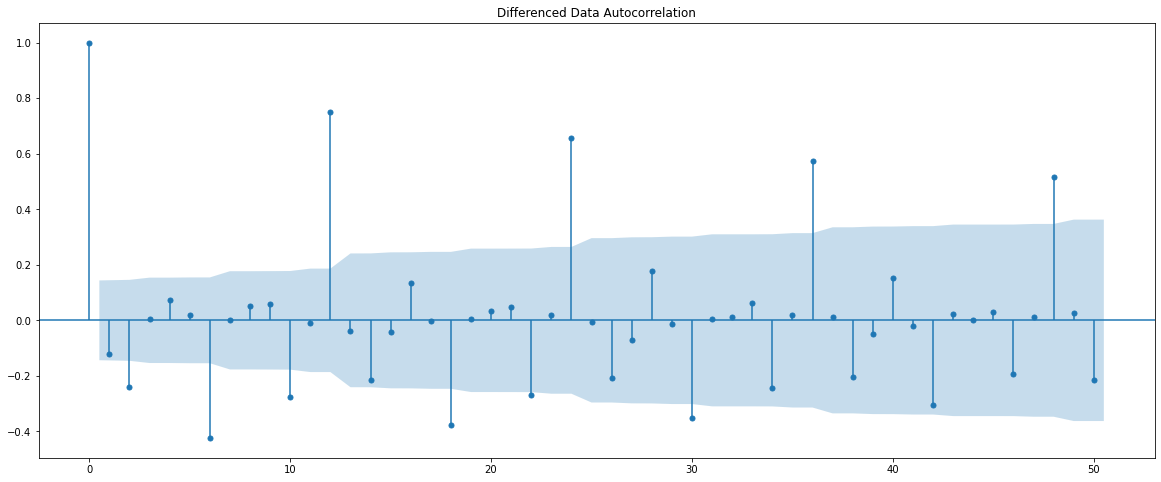

In [47]:
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [48]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [49]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [50]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2100.754859657318
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1999.1303300285783
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1848.6774723372853
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1998.8736001469529
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1935.9103915275425
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1825.9430235426303
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1821.618688209553
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1823.1746273022763
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1804.8184550694925
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2083.564992048796
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1978.4913995435968
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1816.2003051316594
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1963.9428854652078
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1862.5661457505878
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1754.7894678677853
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1762.6652967046468
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1764.3881095498232
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1721.4771188648117
SARIMA(0, 1, 2)x(0, 0, 0, 6) - 

In [51]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1706.563179
53,"(1, 1, 2)","(2, 0, 2, 6)",1708.901115
80,"(2, 1, 2)","(2, 0, 2, 6)",1710.199324
17,"(0, 1, 1)","(2, 0, 2, 6)",1721.477119
44,"(1, 1, 1)","(2, 0, 2, 6)",1723.404522


In [52]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -846.282
Date:                           Sun, 05 Sep 2021   AIC                           1706.563
Time:                                   17:00:10   BIC                           1725.838
Sample:                                        0   HQIC                          1714.388
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9892      0.270     -3.665      0.000      -1.518      -0.460
ma.L2         -0.0108      0.097     -0.112

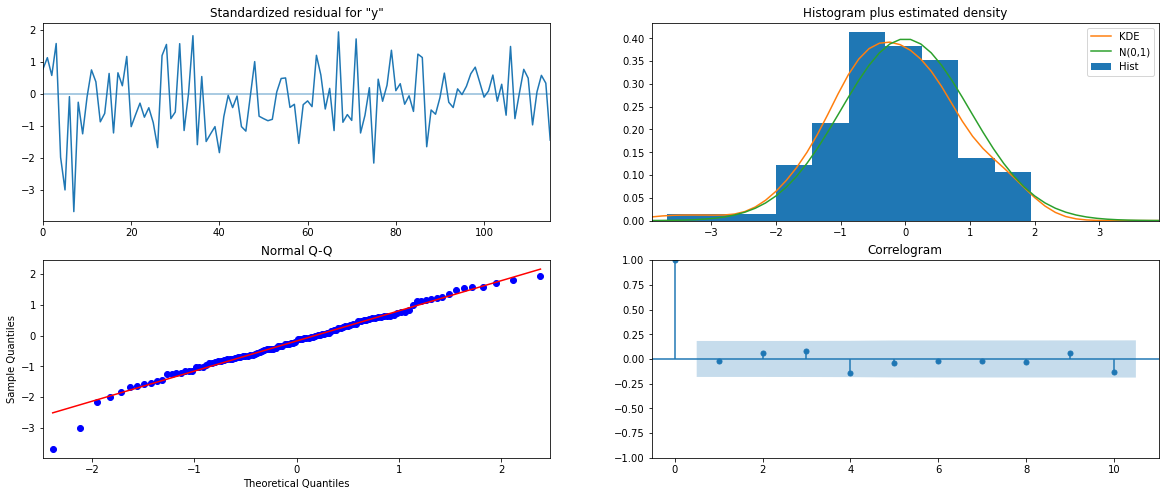

In [53]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

## Predict on the Test Set using this model and evaluate the model.

In [54]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [55]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1524.703490,345.046050,848.425659,2200.981322
1,1814.774792,345.114081,1138.363622,2491.185961
2,2222.019890,345.127354,1545.582705,2898.457074
3,2348.239693,345.126836,1671.803524,3024.675861
4,2850.848990,345.126806,2174.412881,3527.285100


In [56]:
rmse = mean_squared_error(test['RetailSales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

228.04965103842375


In [57]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",564.101959
"ARIMA(0,1,0)",611.287344
"SARIMA(0,1,2)(2,0,2,6)",228.049651


We see that we have huge gain the RMSE value by including the seasonal parameters as well.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [58]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [59]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [60]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2100.754859657318
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1849.657612121491
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1628.6341223633995
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1822.4703606139017
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1803.0984382777974
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1604.034787945594
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1613.240720775781
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1615.1098177010385
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1600.5547788987544
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2083.564992048796
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1827.4180659668027
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1590.1846601887623
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1763.3867250008532
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1718.4543733909925
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1518.8720788032074
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1543.2557042317778
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1544.6704983780508
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1515.3748738255147
SARIMA(0, 1, 2)

In [61]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 12)",1503.095143
26,"(0, 1, 2)","(2, 0, 2, 12)",1503.197772
80,"(2, 1, 2)","(2, 0, 2, 12)",1506.773557
23,"(0, 1, 2)","(1, 0, 2, 12)",1507.234153
50,"(1, 1, 2)","(1, 0, 2, 12)",1508.483159


In [62]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -743.548
Date:                            Sun, 05 Sep 2021   AIC                           1503.095
Time:                                    17:00:55   BIC                           1524.250
Sample:                                         0   HQIC                          1511.666
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6267      0.702     -0.893      0.372      -2.002       0.749
ma.L1         -0.3816      0.712   

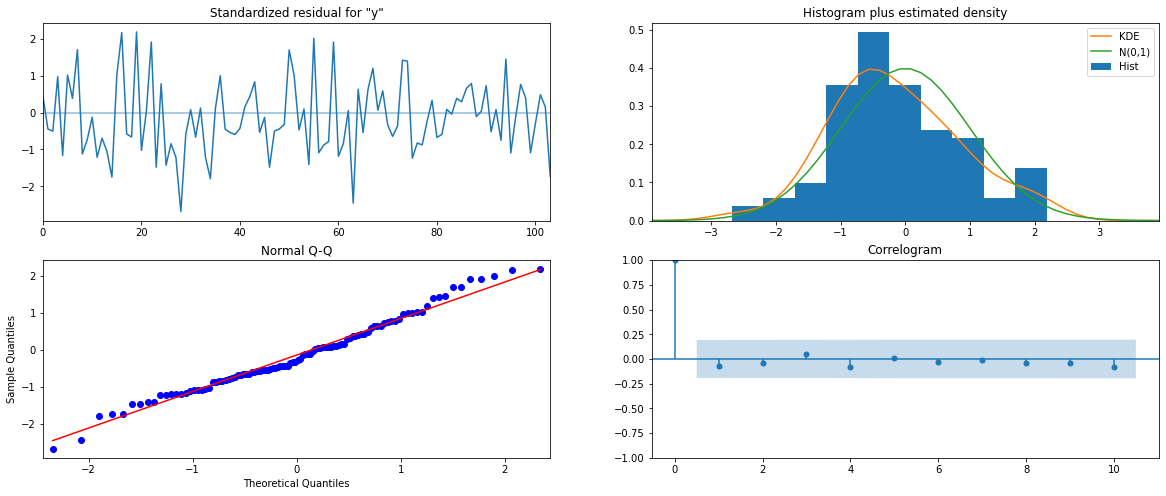

In [63]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

## Predict on the Test Set using this model and evaluate the model.

In [64]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [65]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1665.838227,302.534921,1072.880677,2258.795777
1,1814.308260,302.518793,1221.382320,2407.234199
2,2402.720977,302.538601,1809.756215,2995.685739
3,2359.041245,302.530324,1766.092705,2951.989785
4,2874.136008,302.537139,2281.174112,3467.097904


In [66]:
rmse = mean_squared_error(test['RetailSales'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

273.70298139652374


In [67]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",564.101959
"ARIMA(0,1,0)",611.287344
"SARIMA(0,1,2)(2,0,2,6)",228.049651
"SARIMA(1,1,2)(2,0,2,12)",273.702981


We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

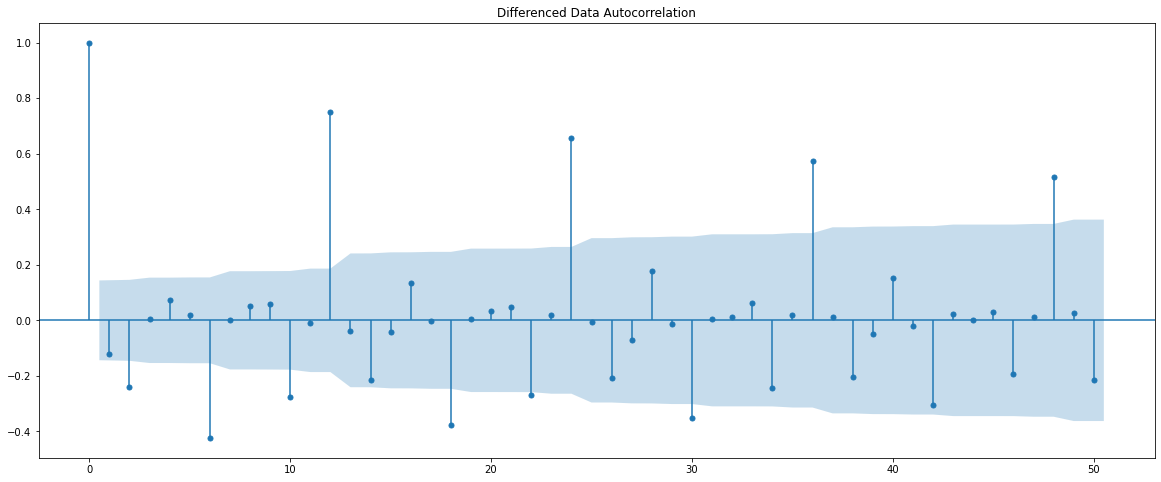

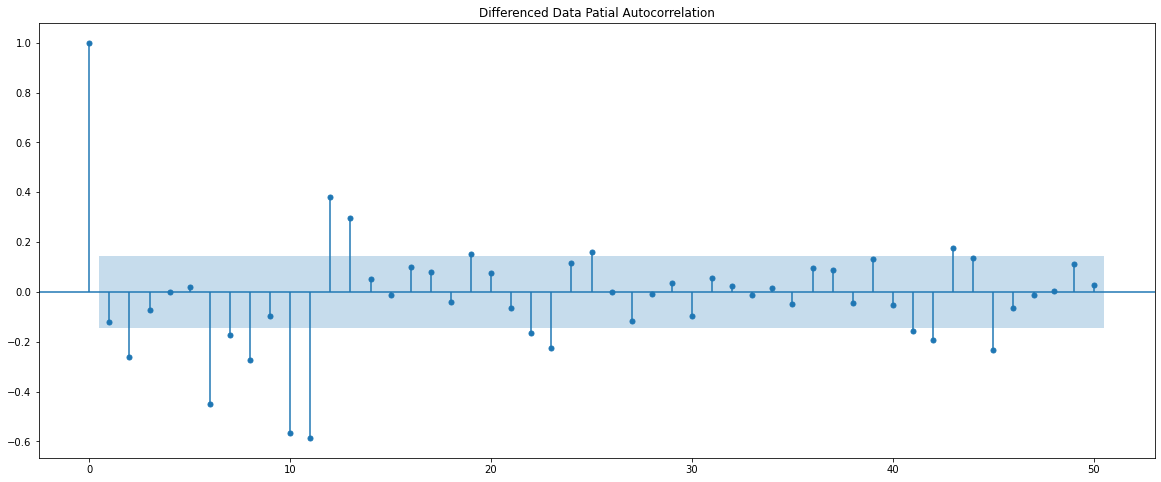

In [68]:
plot_acf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['RetailSales'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

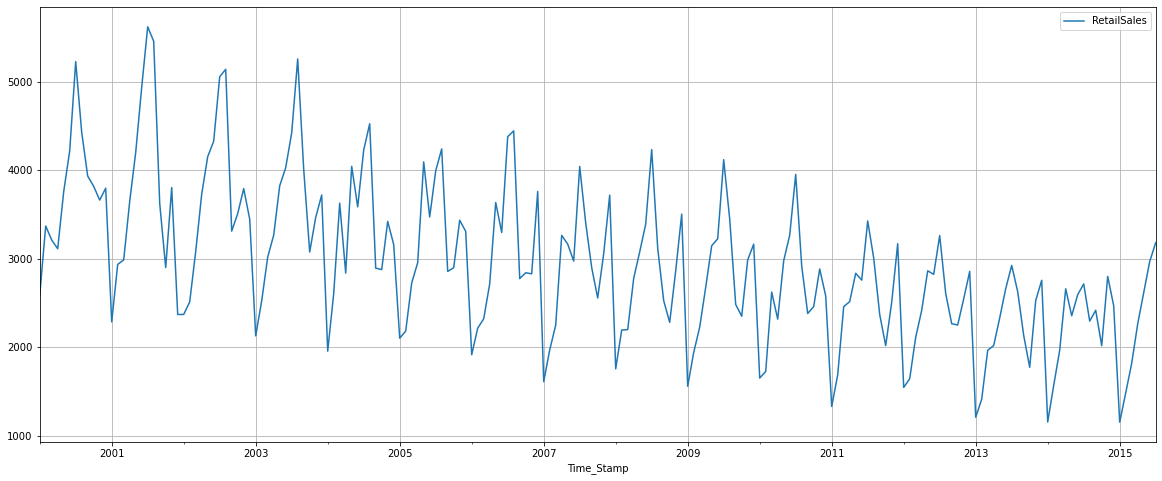

In [69]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

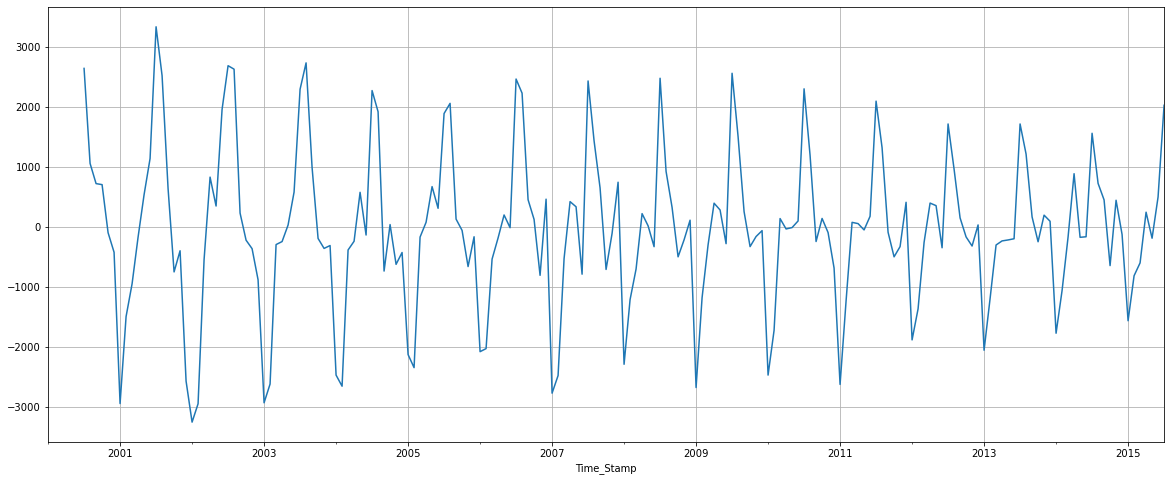

In [70]:
(df['RetailSales'].diff(6)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

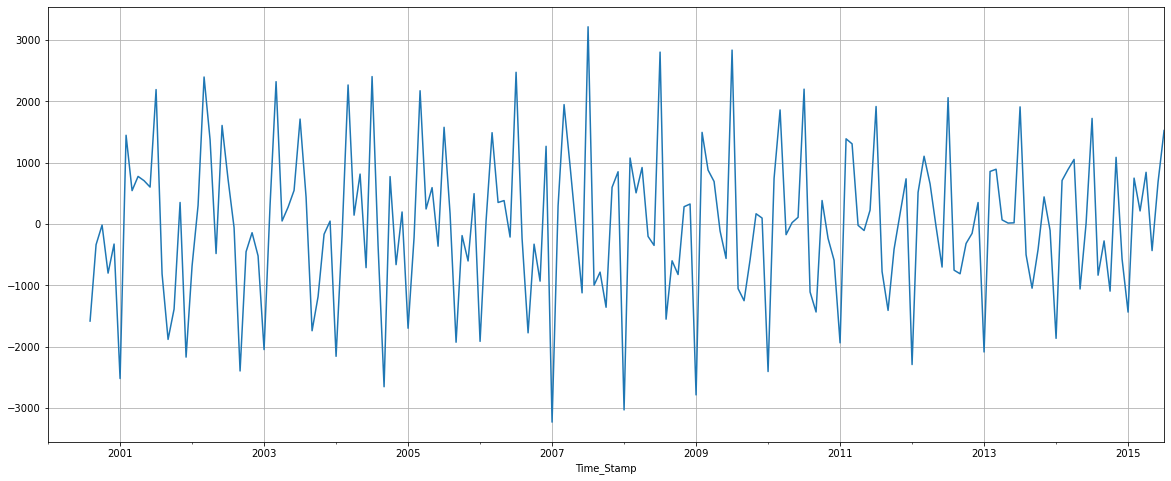

In [71]:
(df['RetailSales'].diff(6)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

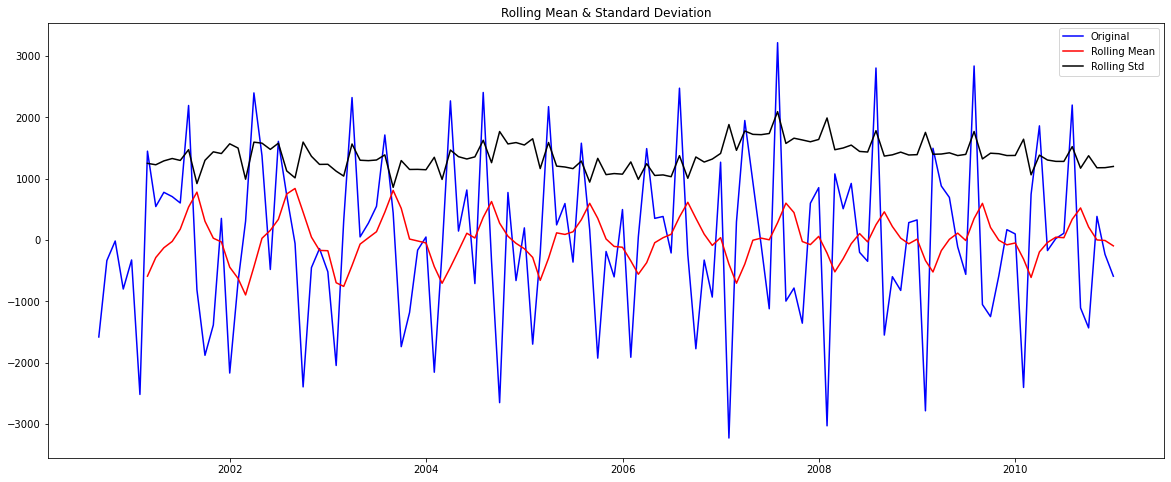

Results of Dickey-Fuller Test:
Test Statistic                -6.977213e+00
p-value                        8.368781e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [72]:
test_stationarity((train['RetailSales'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

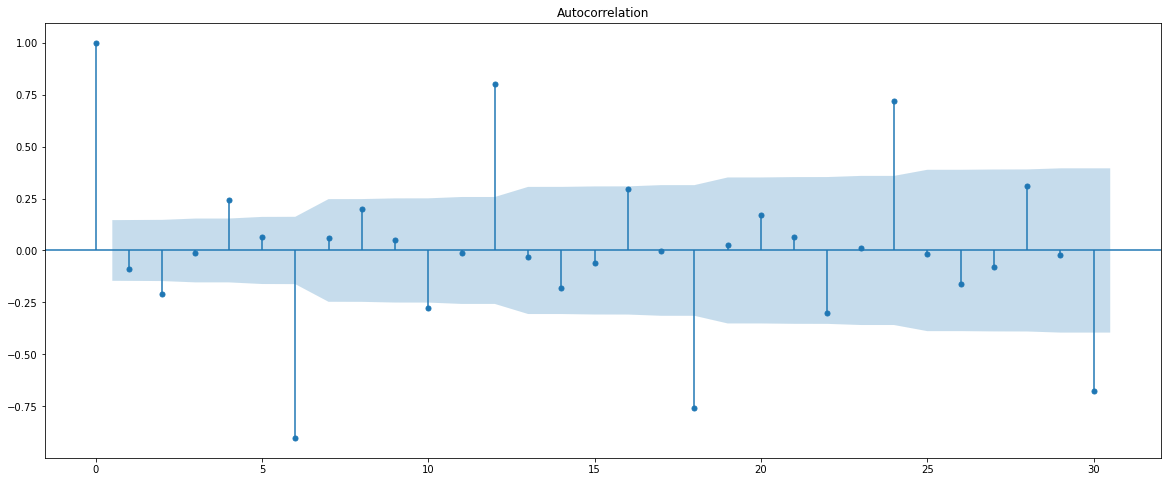

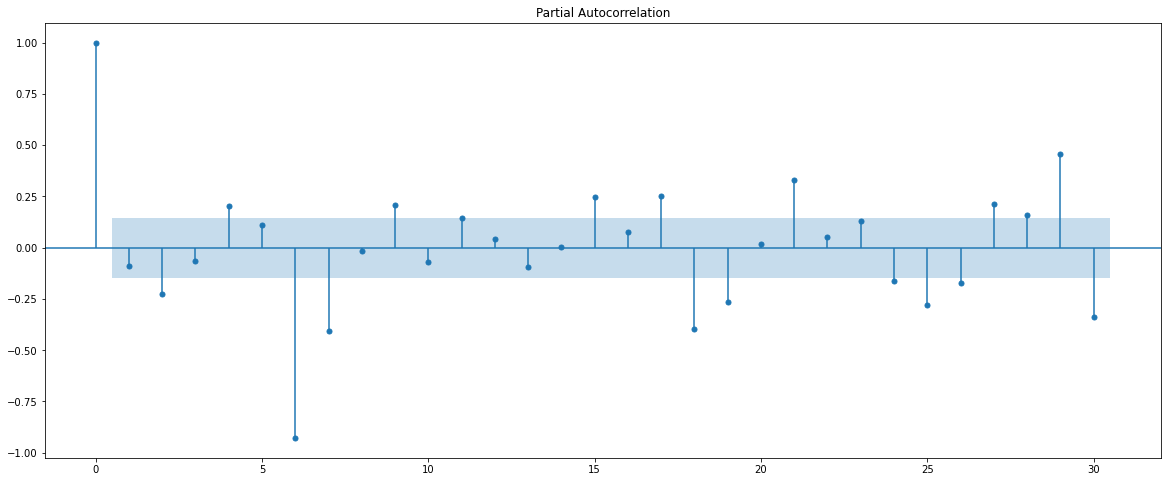

In [73]:
plot_acf((df['RetailSales'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['RetailSales'].diff(6).dropna()).diff(1).dropna(),lags=30);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing on this data. We have not taken the logarithm of the series and then trying it out.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [74]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['RetailSales'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -794.676
Date:                                   Sun, 05 Sep 2021   AIC                           1599.352
Time:                                           17:00:58   BIC                           1612.669
Sample:                                                0   HQIC                          1604.749
                                                   - 132                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.9517      0.037    -25.872      0.000    

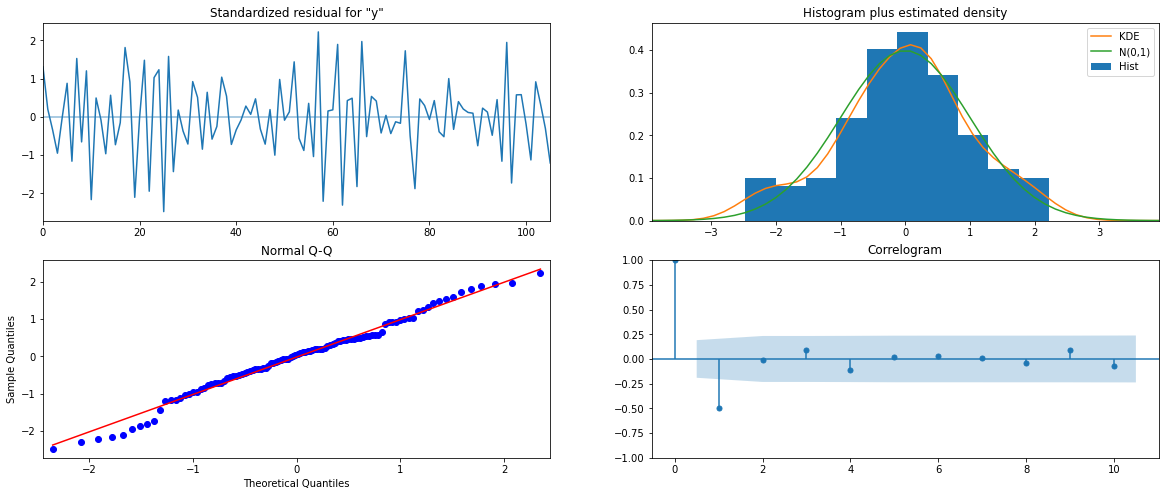

In [75]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [76]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [77]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1098.346406,430.658509,254.271240,1942.421573
1,1354.708194,609.030521,161.030307,2548.386081
2,1884.222465,745.901871,422.281662,3346.163267
3,1842.926537,861.290326,154.828518,3531.024556
4,2400.913032,962.949869,513.565970,4288.260095


In [78]:
rmse = mean_squared_error(test['RetailSales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

771.4130177938318


In [79]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",564.101959
"ARIMA(0,1,0)",611.287344
"SARIMA(0,1,2)(2,0,2,6)",228.049651
"SARIMA(1,1,2)(2,0,2,12)",273.702981
"SARIMA(0,1,0)(1,1,3,6)",771.413018


This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## Building the most optimum model on the Full Data.

In [80]:
full_data_model = sm.tsa.statespace.SARIMAX(df['RetailSales'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\ac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                       RetailSales   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1227.004
Date:                           Sun, 05 Sep 2021   AIC                           2468.008
Time:                                   17:00:59   BIC                           2490.000
Sample:                               01-31-2000   HQIC                          2476.932
                                    - 07-31-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9536      0.116     -8.256      0.000      -1.180      -0.727
ma.L2         -0.0464      0.073     -0.631

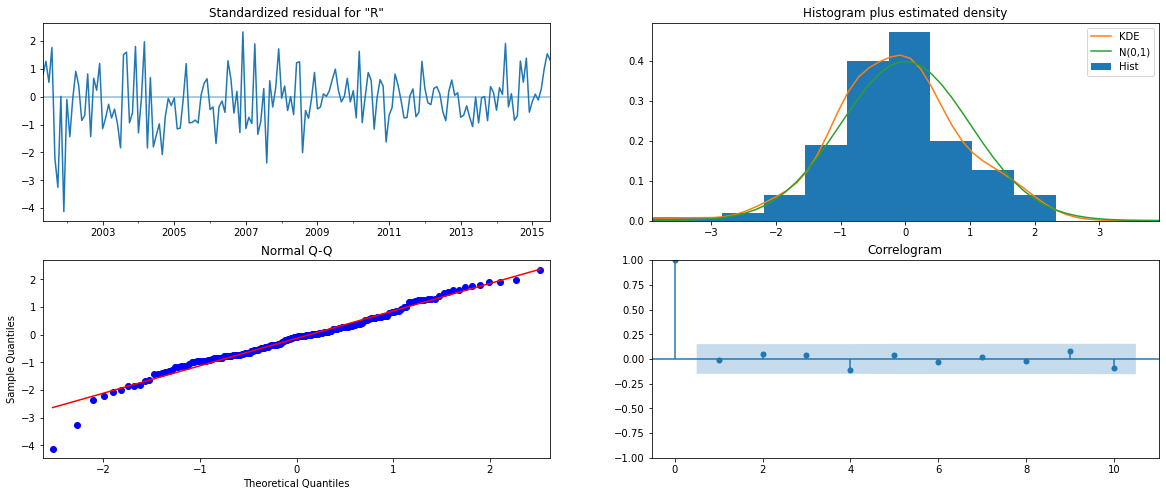

In [81]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 17 months into the future (till the end of next year).

In [82]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=17)

In [83]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

RetailSales,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-08-31,2355.729202,307.198286,1753.631626,2957.826779
2015-09-30,2087.249957,307.638873,1484.288846,2690.211069
2015-10-31,1829.177158,307.638840,1226.216112,2432.138203
2015-11-30,2417.955509,307.638837,1814.994469,3020.916549
2015-12-31,2454.988660,307.638839,1852.027616,3057.949705


In [84]:
rmse = mean_squared_error(df['RetailSales'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 443.2601202325107


In [85]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='2015-08-31',end='2016-12-31', freq='M'))

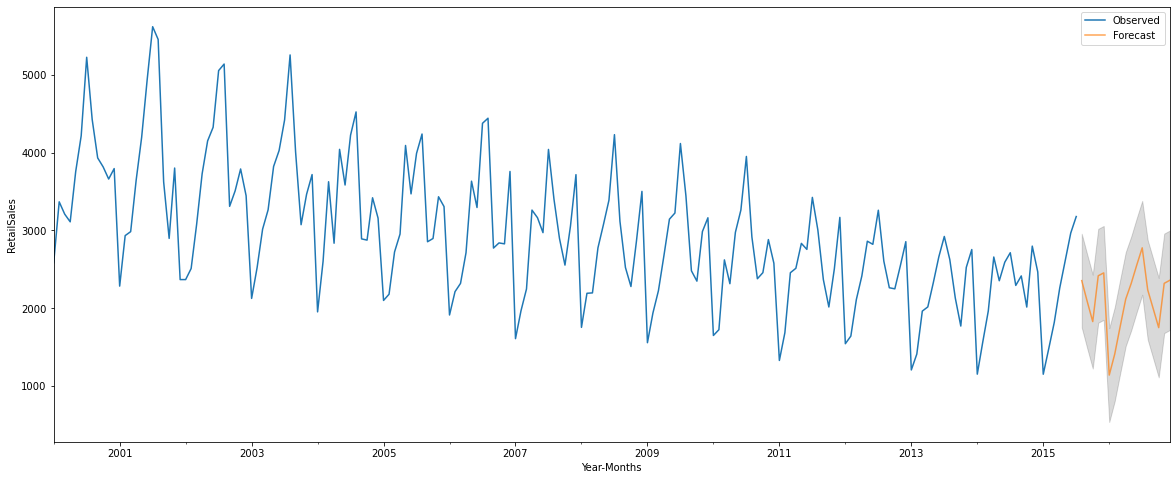

In [86]:
# plot the forecast along with the confidence band

axis = df['RetailSales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [87]:
resultsDf

,RMSE
"ARIMA(2,1,1)",564.101959
"ARIMA(0,1,0)",611.287344
"SARIMA(0,1,2)(2,0,2,6)",228.049651
"SARIMA(1,1,2)(2,0,2,12)",273.702981
"SARIMA(0,1,0)(1,1,3,6)",771.413018


# END